# **Summary of Lab2:**

We started working on the Stack Overflow developer survey 2021. During the lab we realised it did not contain much numerical data for visualisation and so decided to start working with the 2017 SEER breast cancer dataset. 
Initially we tried to understand the attributes pertaining to breast cancer without which we coulnd understand or analyse more on the dataset.

**Differentiate:** Cancer differentiation helps to predict how likely the cancer is to grow and spread.

**T Stage:** T (tumor) tells you the size and location of the tumor which is divided into 5 categories T0 -T4

**N Stage:** N(lymph nodes) tells you if the cancer has spread to any lymph nodes and how many nodes are affected. It is divided into 4 categories N0 -N4

**Regional nodes:** These are the nodes, primarily those in the armpits.

**6th Stage:** Subcategories of the main stage in breast cancer.

**Estrogen Status/Progestrone Status:** Tests the presence of 2 female hormones Estrogen and Progestrone which are responsibile for some breast cancers to grow. 

We worked through the tutorial Jupyter notebook for Lab2. We practiced and learnt concepts related to loading of data from a csv file hosted in github.
 Data.info() gave the overall information of our Dataframe. There were 4024 entries with no missing values.We had attributes with different data types in the dataset with categorical and continous data. We used the describe() to get the statistical summary of numerical columns like Age, Regional nodes examined, Regional nodes Positive,Tumor Size and Survival months. From the statistical overview, we could identify outliers for Tumor size and other numerical attributes.

 We used the correlation matrix to find correlation of all numerical columns of the dataset using 2 methods like data.corr() and pandas scatter_matrix(). We found that Age has No Linear Correlation with all of the other numerical Attributes present.

 To get more insight about the data through visualisation, we plotted a histogram for numerical attributes.It clearly showed a substantial increase in the number of breast cancer patients above the age 45.It became evident that age is a huge factor for breast cancer disagnosis in females.Females of age 45 and above are more likely to be affected. In addition, we plotted a pie chart the know the distribution of differentiation.More patients were Moderately differentiated with very less Undifferentiated cancer.






# Lab 2 : 'BREAST CANCER' Data Exploration and Visualization (Getting to know your data)

## Setup

In [2]:
import sys
assert sys.version_info >= (3, 5)
# Python ≥3.5 is required


In [3]:
# Scikit-Learn ≥0.20 is required
import sklearn
assert sklearn.__version__ >= "0.20"

In [4]:
# Common imports
import numpy as np
import os
import tarfile
import urllib
import pandas as pd
import urllib.request


In [5]:
# To plot pretty figures
%matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt

# Get the data

In [6]:
data = pd.read_csv("https://raw.githubusercontent.com/BenCoke12/DMMLG3/main/Breast_Cancer.csv")
data.head() #Display the top five rows of the DataFrame by default
data.head(10)# Displays top 10 rows of the dataframe.

,Age,Race,Marital Status,T Stage,N Stage,6th Stage,differentiate,Grade,A Stage,Tumor Size,Estrogen Status,Progesterone Status,Regional Node Examined,Reginol Node Positive,Survival Months,Status
0,68,White,Married,T1,N1,IIA,Poorly differentiated,3,Regional,4,Positive,Positive,24,1,60,Alive
1,50,White,Married,T2,N2,IIIA,Moderately differentiated,2,Regional,35,Positive,Positive,14,5,62,Alive
2,58,White,Divorced,T3,N3,IIIC,Moderately differentiated,2,Regional,63,Positive,Positive,14,7,75,Alive
3,58,White,Married,T1,N1,IIA,Poorly differentiated,3,Regional,18,Positive,Positive,2,1,84,Alive
4,47,White,Married,T2,N1,IIB,Poorly differentiated,3,Regional,41,Positive,Positive,3,1,50,Alive
5,51,White,Single,T1,N1,IIA,Moderately differentiated,2,Regional,20,Positive,Positive,18,2,89,Alive
6,51,White,Married,T1,N1,IIA,Well differentiated,1,Regional,8,Positive,Positive,11,1,54,Alive
7,40,White,Married,T2,N1,IIB,Moderately differentiated,2,Regional,30,Positive,Positive,9,1,14,Dead
8,40,White,Divorced,T4,N3,IIIC,Poorly differentiated,3,Regional,103,Positive,Positive,20,18,70,Alive
9,69,White,Married,T4,N3,IIIC,Well differentiated,1,Distant,32,Positive,Positive,21,12,92,Alive


In [7]:
from pandas.core.indexes.range import RangeIndex
#This method prints information about a DataFrame including the dtype and columns, non-null values and memory usage.
data.info() 
#Q2 Can you tell if there are any missing values? If yes, which attribuites contain missing values ? 
#Ans: We have no missing values in this dataset. The RangeIndex shows 4024 entries and the individual count of all the attributes also shows that there are 4024 entries


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4024 entries, 0 to 4023
Data columns (total 16 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   Age                     4024 non-null   int64 
 1   Race                    4024 non-null   object
 2   Marital Status          4024 non-null   object
 3   T Stage                 4024 non-null   object
 4   N Stage                 4024 non-null   object
 5   6th Stage               4024 non-null   object
 6   differentiate           4024 non-null   object
 7   Grade                   4024 non-null   object
 8   A Stage                 4024 non-null   object
 9   Tumor Size              4024 non-null   int64 
 10  Estrogen Status         4024 non-null   object
 11  Progesterone Status     4024 non-null   object
 12  Regional Node Examined  4024 non-null   int64 
 13  Reginol Node Positive   4024 non-null   int64 
 14  Survival Months         4024 non-null   int64 
 15  Stat

Notes: The data types of the breast cancer attributes are a mix of objects and integers. The numeric data fields are Age(int64), Tumor size(int64), Regional Node Examined(int64),Reginol Node Positive(Int64) and Survival Months(int64).

In [11]:
age_data=data["Race"].value_counts() 
age_data

# Q3 What does the value_count() method display?
# Answer-> Basically to check the categories present in the categorical attributes and the count of each catregories present. 
#For above code, we have breast cancer patients ranging from age group 30 to 69.

White    3413
Other     320
Black     291
Name: Race, dtype: int64

In [89]:
#This method shows a statistical summary of the numerical attributes 
data.describe() 

,Age,Tumor Size,Regional Node Examined,Reginol Node Positive,Survival Months
count,4024.000000,4024.000000,4024.000000,4024.000000,4024.000000
mean,53.972167,30.473658,14.357107,4.158052,71.297962
std,8.963134,21.119696,8.099675,5.109331,22.921430
min,30.000000,1.000000,1.000000,1.000000,1.000000
25%,47.000000,16.000000,9.000000,1.000000,56.000000
50%,54.000000,25.000000,14.000000,2.000000,73.000000
75%,61.000000,38.000000,19.000000,5.000000,90.000000
max,69.000000,140.000000,61.000000,46.000000,107.000000



The 25%, 50%, and 75% rows show the corresponding percentiles: a percentile indicates the value below which a given percentage of observations in a group of observations fall. Outlierscan be calculated using (Q1 - 1.5 * IQR or Q3 + 1.5 * IQR). We can see few outliers in Tumor size, Regional node examined and Regional node positive.

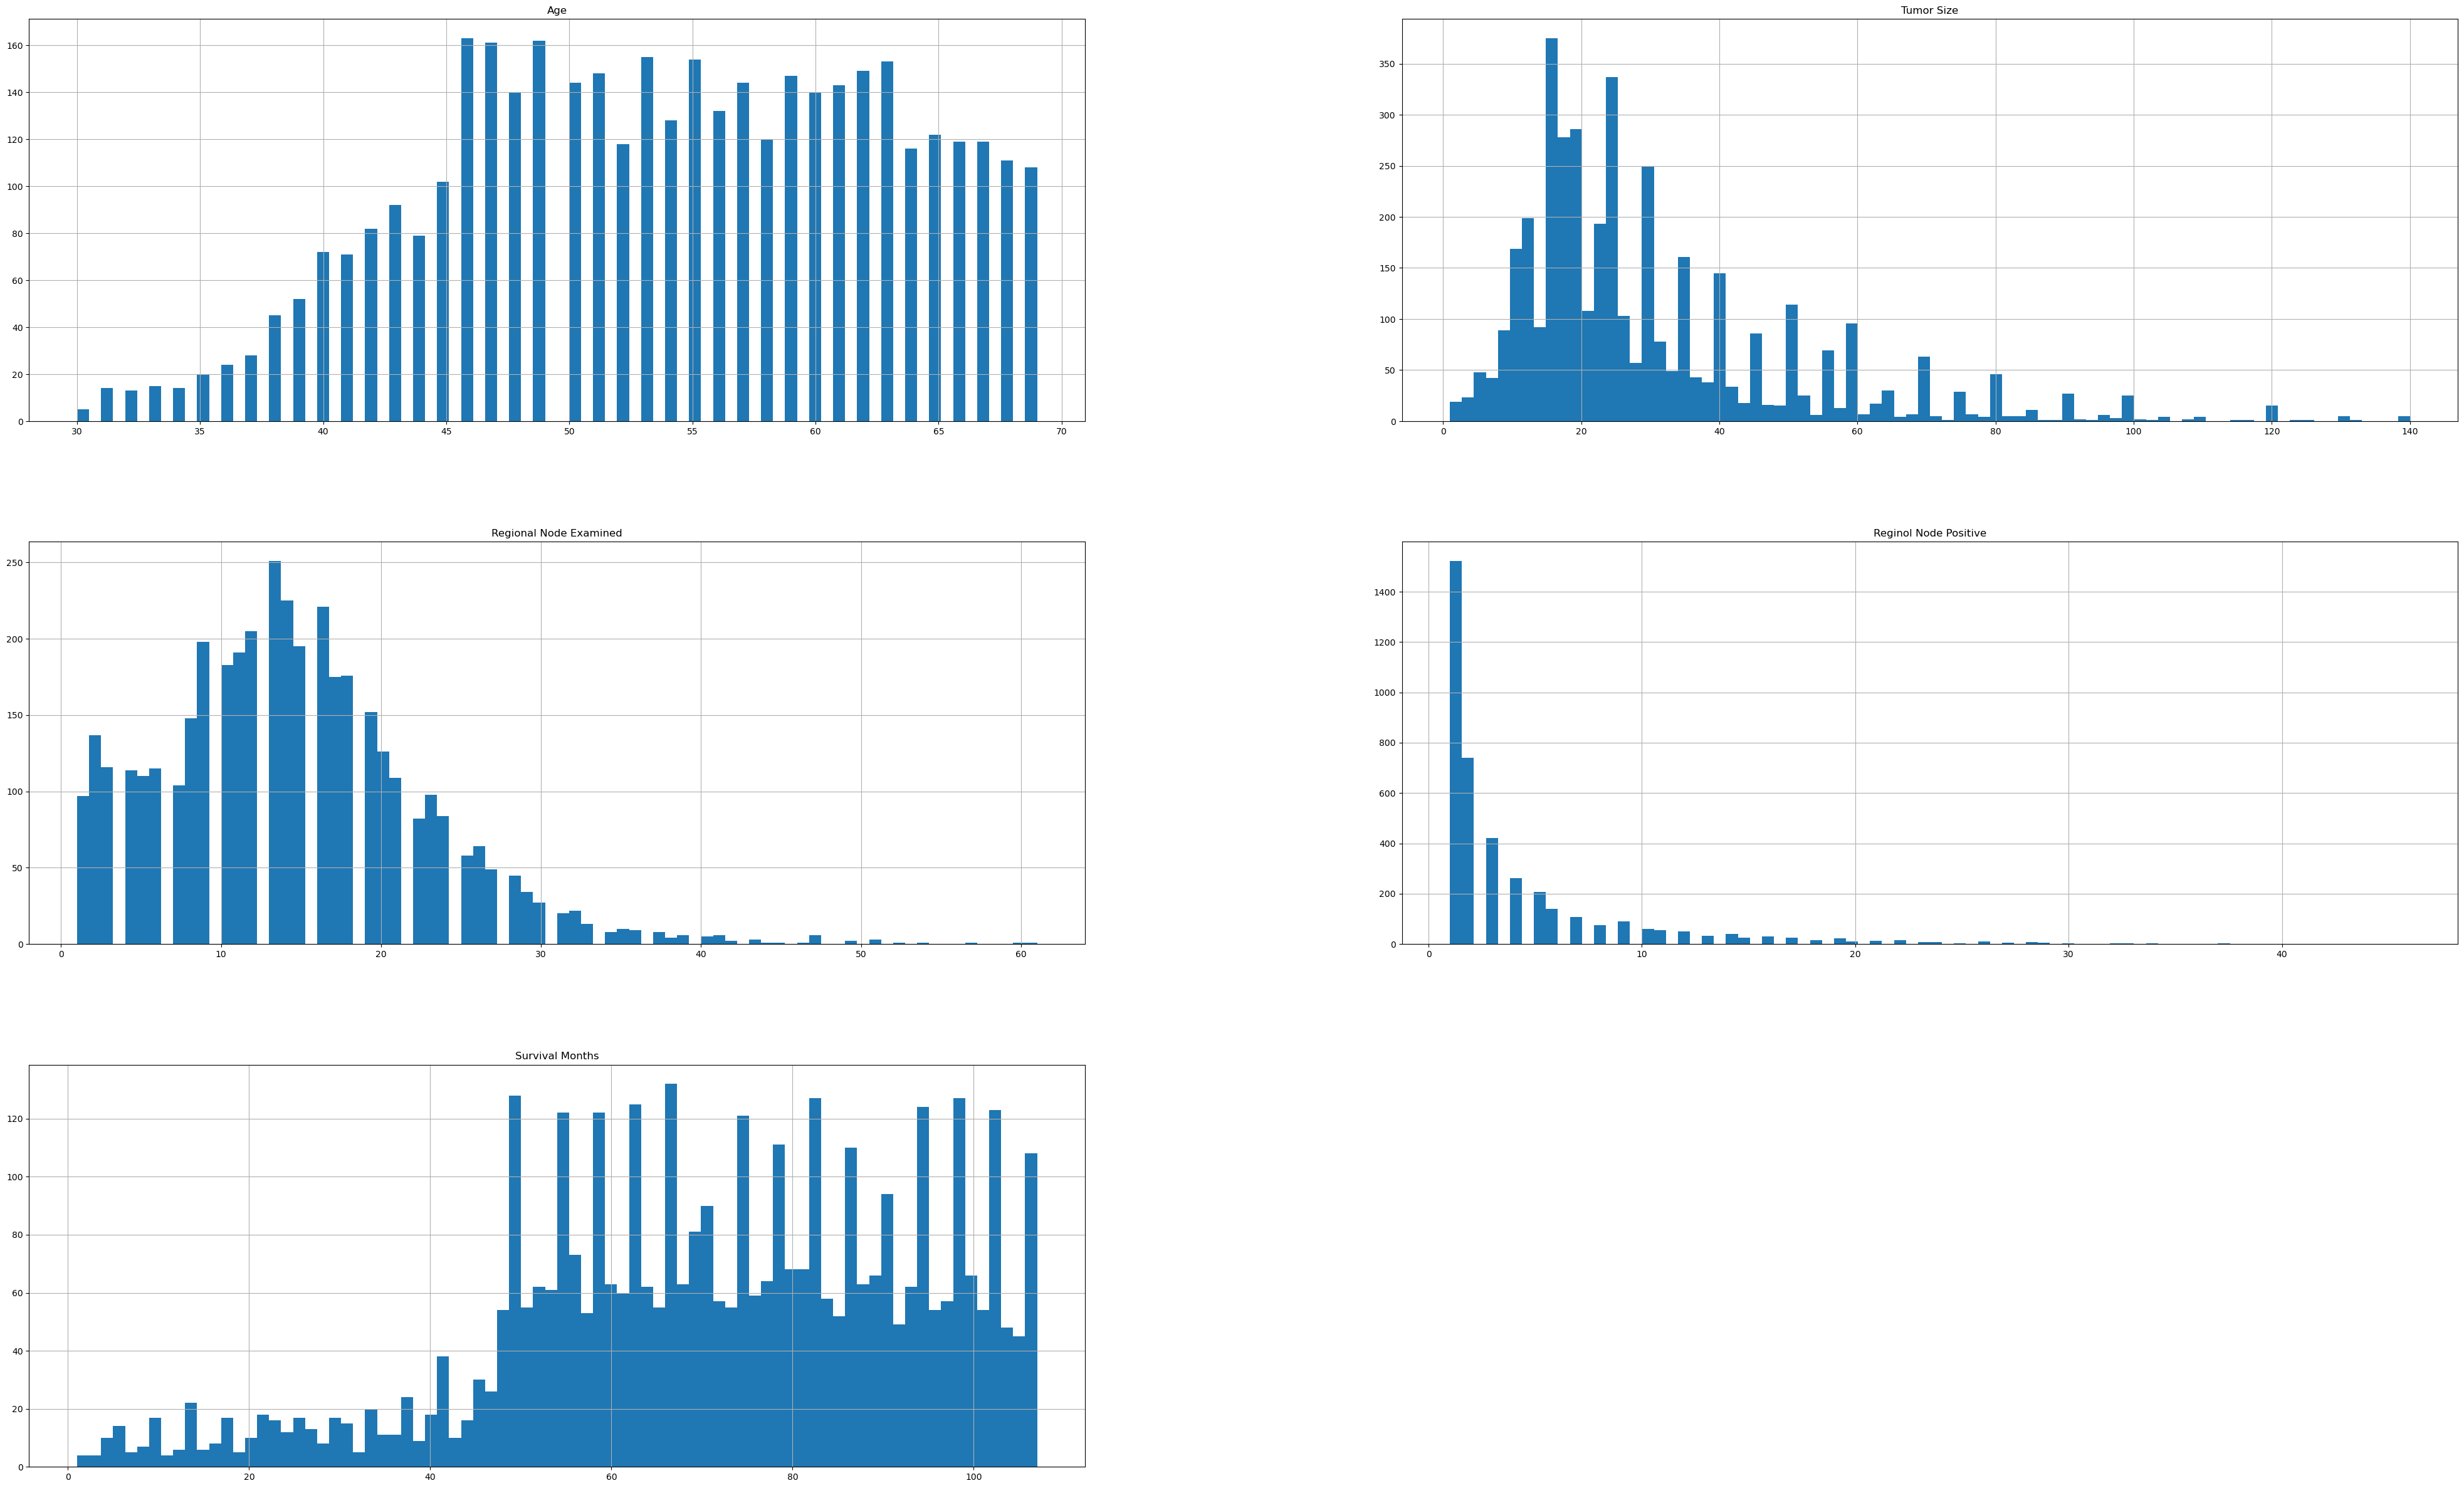

In [90]:
#To plot a histogram for each numerical attribute
data.hist(bins=80, figsize=(50,30))
plt.show()
# Q4 List down the main observations you noted from the statistical summary and the histogram
#Ans:
#Age:  From the histogram for Age category, we see a substantial increase in the number of patients above the age 45. 
   #It is evident that age is a huge factor for breast cancer disagnosis in females.Females of age 45 and above are more likely to be affected.
#



# Visualizing Geographical Data

<AxesSubplot:xlabel='Age', ylabel='Tumor Size'>

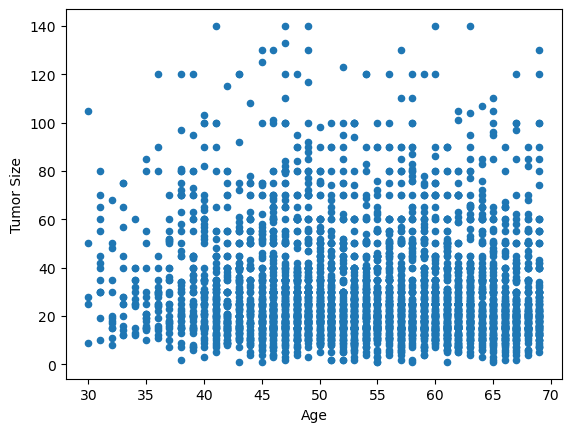

In [91]:
# Q5 Now you will plot 3 different variations of the data, which one is more indicative and why?
data.plot(kind="scatter", x="Age", y="Tumor Size")



<AxesSubplot:xlabel='Age', ylabel='Survival Months'>

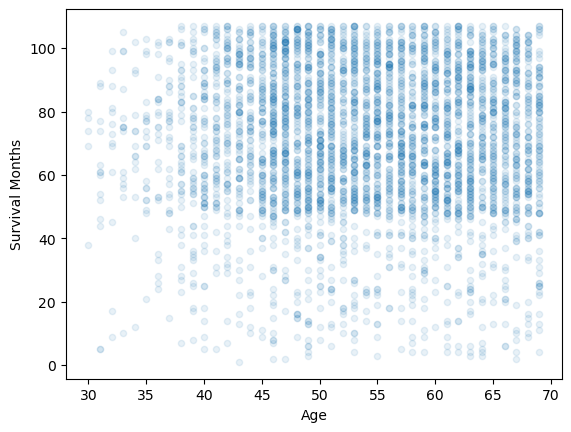

In [92]:
data.plot(kind="scatter", x="Age", y="Survival Months",alpha = 0.1)

<AxesSubplot:xlabel='Age', ylabel='Survival Months'>

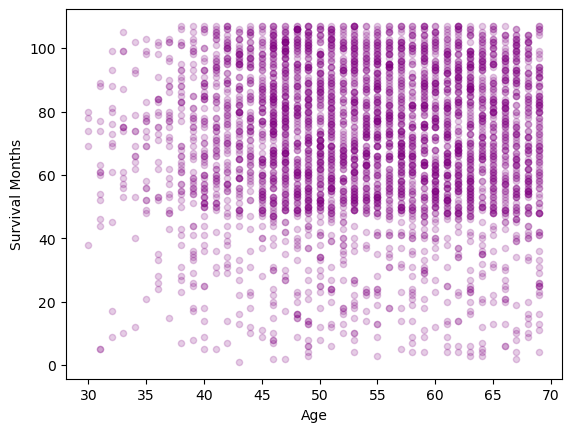

In [93]:
data.plot(kind="scatter", x="Age", y="Survival Months", alpha=0.2, color=(0.5,0,0.5))
  
# plots California housing prices:red is expensive, blue is cheap. Large circles indicate areas with larger populations.
# The radius of each circle represents the district’s population(option s) and the color represents the price (option c). 


In [94]:
corr_matrix = data.corr()
corr_matrix["Reginol Node Positive"].sort_values(ascending=False)
# Q6 Which are the most correlated attributes with the output variable?
# Does that make sense? 
# Age has No Linear Correlation with all of the other numerical Attributes present.

Reginol Node Positive     1.000000
Regional Node Examined    0.411580
Tumor Size                0.242322
Age                       0.012586
Survival Months          -0.135214
Name: Reginol Node Positive, dtype: float64

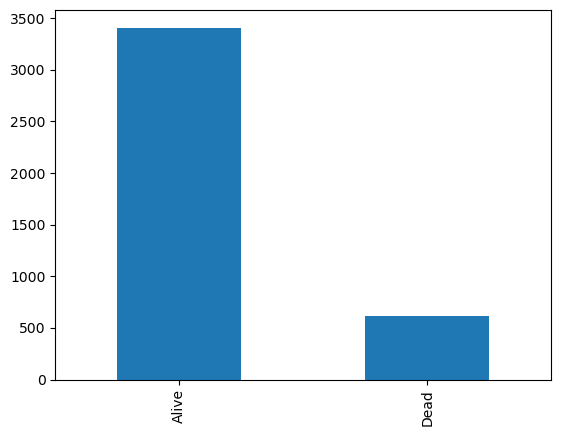

In [95]:

data["Status"].value_counts().plot.bar()#bar plot in panda
plt.show()
# Below bar chart shows the current status of the patients . 

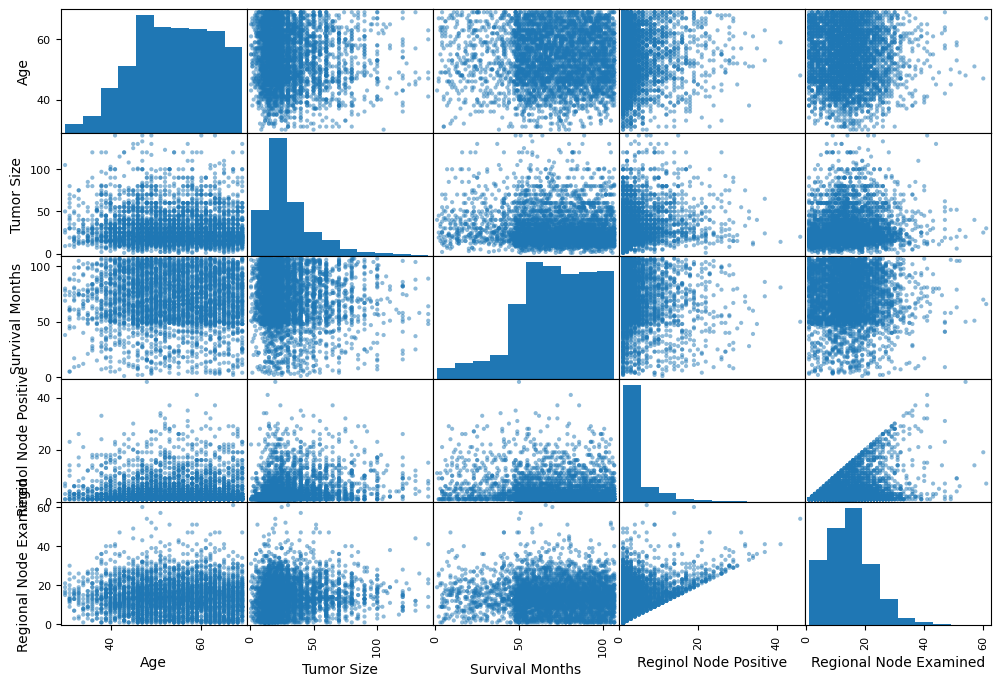

In [96]:
from pandas.plotting import scatter_matrix

attributes = ["Age", "Tumor Size", "Survival Months","Reginol Node Positive","Regional Node Examined"]
scatter_matrix(data[attributes], figsize=(12, 8))
# Another way to check for correlation between attributes is to use the pandas scatter_matrix() function above
# Here we choose to plot 4 promising  numerical attributes against each other
plt.show()

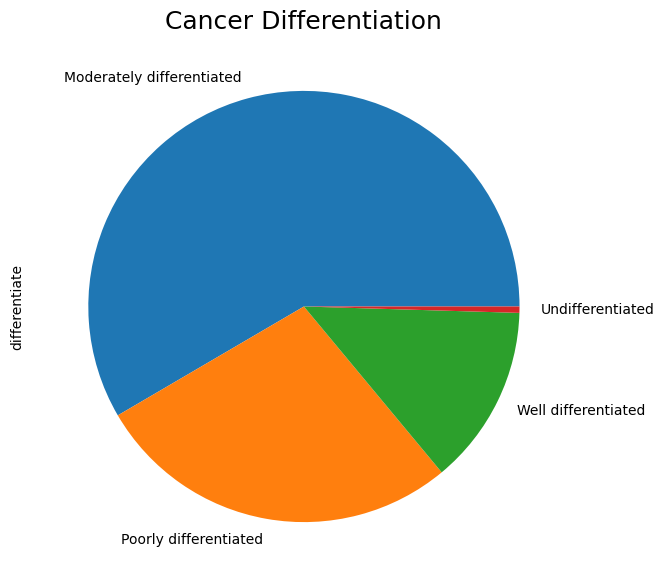

In [97]:
figure = plt.figure(figsize = (7,7))

data['differentiate'].value_counts().plot.pie()

plt.title('Cancer Differentiation', size = 18)

plt.show()
#Cancer differentiation helps to predict how likely the cancer is to grow and spread. 
#From the pie chart, it can be clearly seen that more patients are Moderately differentiated with very less Undifferentiated cancer.

<Figure size 1500x700 with 0 Axes>

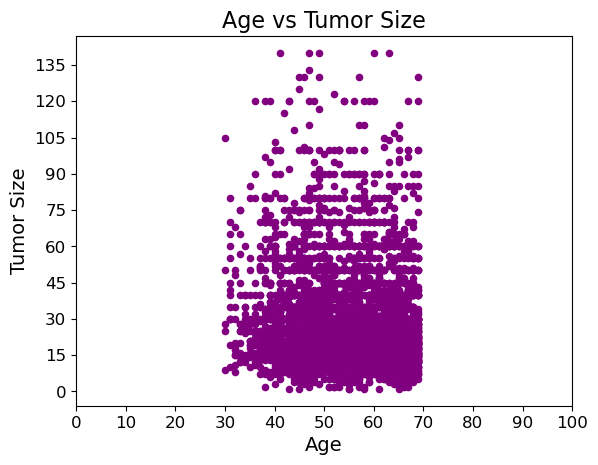

In [98]:

figure = plt.figure(figsize=[15, 7])
data.plot.scatter(x='Age', y='Tumor Size', color='purple')
plt.xticks(ticks=np.arange(0, 110, 10), size=12)
plt.yticks(ticks=np.arange(0, 150, 15), size=12)
plt.xlabel(xlabel='Age', size=14)
plt.ylabel(ylabel='Tumor Size', size=14)
plt.title(label='Age vs Tumor Size', size=16)
plt.show()

Stacked Bar to display compare Tumor Size, Regional node diagnosis(presence and status) for diffrent age group.

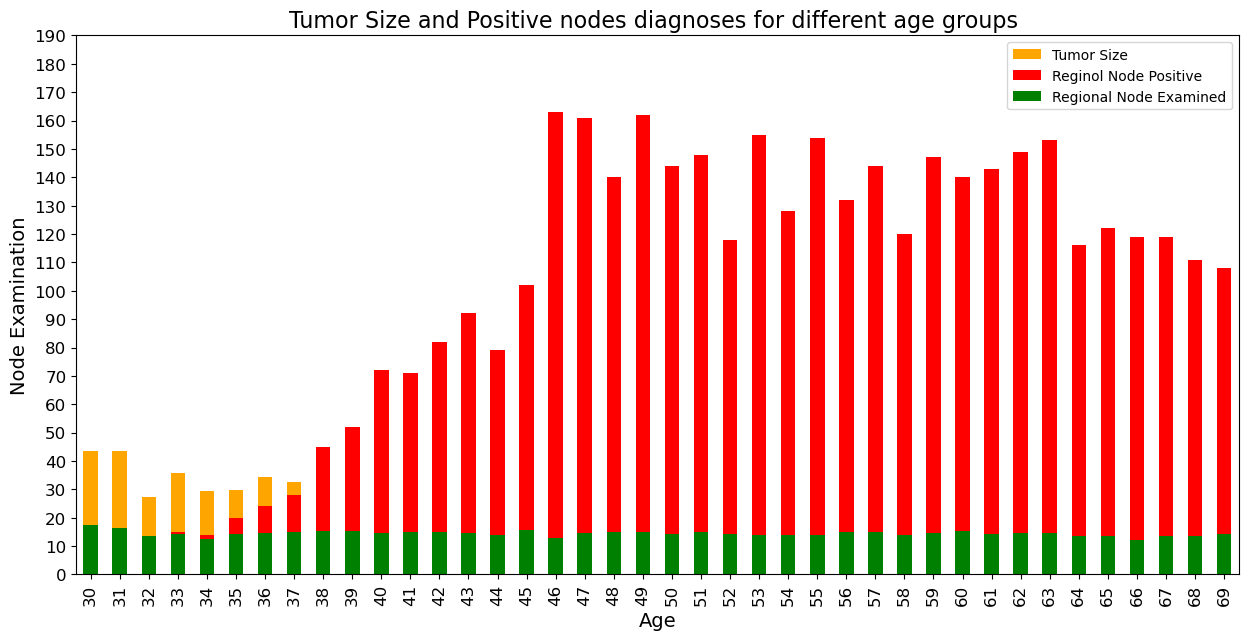

In [99]:

figure = plt.figure(figsize=[15, 7])
data.groupby(by=['Age'])['Tumor Size'].mean().plot.bar(color='orange')
data.groupby(by=['Age'])['Reginol Node Positive'].count().plot.bar(color='red')
data.groupby(by=['Age'])['Regional Node Examined'].mean().plot.bar(color='green')
plt.xticks(size=12, rotation=90)
plt.yticks(ticks=np.arange(0, 200, 10), size=12)
plt.xlabel(xlabel='Age', size=14)
plt.ylabel(ylabel='Node Examination', size=14)
plt.title(label='Tumor Size and Positive nodes diagnoses for different age groups ', size=16)
plt.legend()
plt.show()




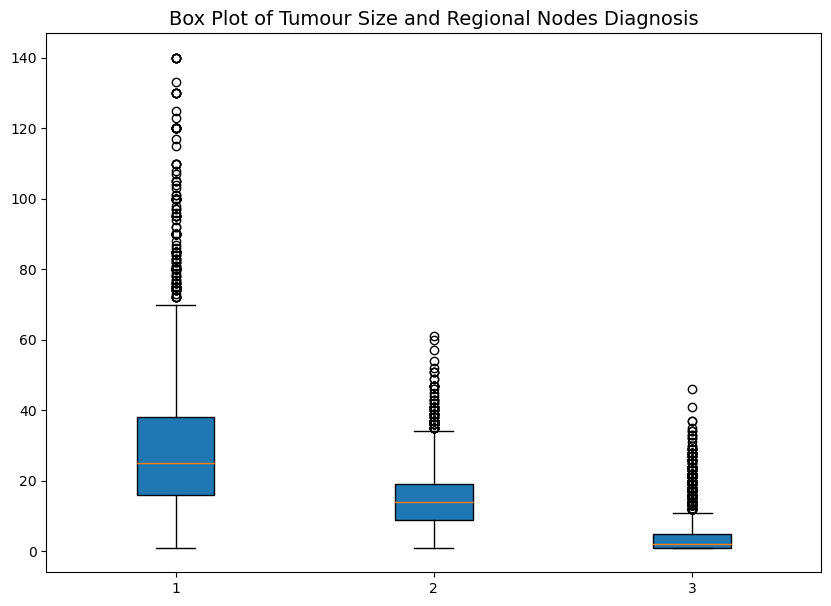

In [100]:


fig = plt.figure(figsize =(10, 7))
 
# Creating plot
boxplot_data = [data["Tumor Size"], data["Regional Node Examined"], data["Reginol Node Positive"]]
plt.boxplot(boxplot_data, patch_artist ='True')
plt.title("Box Plot of Tumour Size and Regional Nodes Diagnosis", size =14) 
# show plot
plt.show()


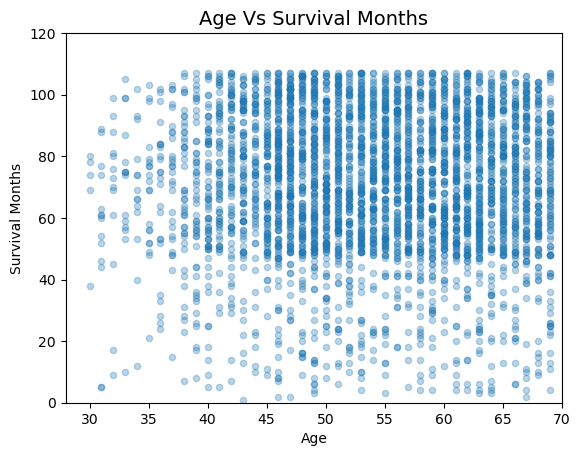

In [101]:
# let’s zoom in on the correlation scatterplot "median house value & the median income,"
data.plot(kind="scatter", x="Age", y="Survival Months",
             alpha=0.3)
plt.axis([28, 70, 0, 120])
plt.title('Age Vs Survival Months', size =14)
plt.show()
#Q7 Describe the plot below. What does this indicate? Do you have an explanation for the solid line?
#Since there is No linear Correlation between the attributes we don't get any plot.

# Experimenting with Attribute Combinations

In [107]:
data = data.drop(data[data.Status == "Alive"].index)
data["Percent of nodes positive"] = (data["Reginol Node Positive"]/data["Regional Node Examined"]) * 100
#data.head()
data.corr()["Survival Months"].sort_values(ascending=False)
#data.plot.bar(x="Status", y="Survival Months")
#data.plot(kind="scatter", x="Survival Months", y="Percent of nodes positive",
#             alpha=0.3)

Survival Months              1.000000
Regional Node Examined      -0.030102
Age                         -0.030381
Reginol Node Positive       -0.064184
Tumor Size                  -0.073308
Percent of nodes positive   -0.087978
Name: Survival Months, dtype: float64

In [61]:
# Here you will generate new features. This is what we call feature engineering
# Q8 What are the new features that you are generating? Do they make sense ?

 #Ans : We are adding 2 new columns 'Risk Status' and 'Recovery Chances' based on conditions from existing columns
#Add positive nodes per nodes examined column/percent positive nodes
#Dropping rows where Status= 'Dead' as it doesnt make sense while adding 'Risk Status' and 'Recovery Chances'
data = data.drop(data[data.Status == 'Dead'].index)
data.head()
data.info()
#We had 4024 records before and now 616 rows were dropped with Status='Dead'


<class 'pandas.core.frame.DataFrame'>
Int64Index: 3408 entries, 0 to 4023
Data columns (total 16 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   Age                     3408 non-null   int64 
 1   Race                    3408 non-null   object
 2   Marital Status          3408 non-null   object
 3   T Stage                 3408 non-null   object
 4   N Stage                 3408 non-null   object
 5   6th Stage               3408 non-null   object
 6   differentiate           3408 non-null   object
 7   Grade                   3408 non-null   object
 8   A Stage                 3408 non-null   object
 9   Tumor Size              3408 non-null   int64 
 10  Estrogen Status         3408 non-null   object
 11  Progesterone Status     3408 non-null   object
 12  Regional Node Examined  3408 non-null   int64 
 13  Reginol Node Positive   3408 non-null   int64 
 14  Survival Months         3408 non-null   int64 
 15  Stat

In [78]:
data = data.drop(data[data.Status == "Alive"].index)
data["Percent of nodes positive"] = (data["Reginol Node Positive"]/data["Regional Node Examined"]) * 100
data.head()
#data.corr()["Percent of nodes positive"].sort_values(ascending=False)

#data.plot(kind="scatter", x="Survival Months", y="Percent of nodes positive",
#             alpha=0.3)

,Age,Race,Marital Status,T Stage,N Stage,6th Stage,differentiate,Grade,A Stage,Tumor Size,Estrogen Status,Progesterone Status,Regional Node Examined,Reginol Node Positive,Survival Months,Status,Risk Status,Treatment Recommended,Percent of nodes positive


In [62]:
data['Risk Status'] = ['High Risk' if x == 'T3' or x == 'T4' else  'Moderate Risk' if x == 'T2' else 'Low Risk' for x in data['T Stage ']]
data.head()

,Age,Race,Marital Status,T Stage,N Stage,6th Stage,differentiate,Grade,A Stage,Tumor Size,Estrogen Status,Progesterone Status,Regional Node Examined,Reginol Node Positive,Survival Months,Status,Risk Status
0,68,White,Married,T1,N1,IIA,Poorly differentiated,3,Regional,4,Positive,Positive,24,1,60,Alive,Low Risk
1,50,White,Married,T2,N2,IIIA,Moderately differentiated,2,Regional,35,Positive,Positive,14,5,62,Alive,Moderate Risk
2,58,White,Divorced,T3,N3,IIIC,Moderately differentiated,2,Regional,63,Positive,Positive,14,7,75,Alive,High Risk
3,58,White,Married,T1,N1,IIA,Poorly differentiated,3,Regional,18,Positive,Positive,2,1,84,Alive,Low Risk
4,47,White,Married,T2,N1,IIB,Poorly differentiated,3,Regional,41,Positive,Positive,3,1,50,Alive,Moderate Risk


In [63]:
#feature engineering 2
data["Treatment Recommended"] = ['Hormone Therapy' if x == 'Positive'  else 'Other' for x in data['Estrogen Status']]
data.tail(15)


,Age,Race,Marital Status,T Stage,N Stage,6th Stage,differentiate,Grade,A Stage,Tumor Size,Estrogen Status,Progesterone Status,Regional Node Examined,Reginol Node Positive,Survival Months,Status,Risk Status,Treatment Recommended
4007,44,White,Single,T4,N1,IIIB,Moderately differentiated,2,Regional,21,Positive,Positive,10,1,75,Alive,High Risk,Hormone Therapy
4008,60,White,Single,T1,N1,IIA,Well differentiated,1,Regional,18,Positive,Positive,19,2,52,Alive,Low Risk,Hormone Therapy
4009,53,White,Divorced,T3,N1,IIIA,Moderately differentiated,2,Regional,100,Positive,Negative,20,1,107,Alive,High Risk,Hormone Therapy
4011,62,White,Widowed,T2,N2,IIIA,Moderately differentiated,2,Regional,25,Positive,Positive,24,4,100,Alive,Moderate Risk,Hormone Therapy
4012,51,White,Married,T3,N3,IIIC,Poorly differentiated,3,Regional,80,Positive,Positive,20,12,79,Alive,High Risk,Hormone Therapy
4013,68,White,Married,T1,N1,IIA,Well differentiated,1,Regional,15,Negative,Negative,10,1,102,Alive,Low Risk,Other
4014,40,White,Married,T3,N1,IIIA,Moderately differentiated,2,Regional,68,Positive,Positive,22,2,86,Alive,High Risk,Hormone Therapy
4015,65,White,Married,T2,N2,IIIA,Moderately differentiated,2,Regional,40,Positive,Positive,4,4,68,Alive,Moderate Risk,Hormone Therapy
4016,54,White,Married,T2,N1,IIB,Well differentiated,1,Regional,50,Positive,Positive,29,2,52,Alive,Moderate Risk,Hormone Therapy
4018,64,White,Married,T1,N1,IIA,Moderately differentiated,2,Regional,10,Positive,Positive,11,1,70,Alive,Low Risk,Hormone Therapy


In [64]:
corr_matrix = data.corr()
corr_matrix["Tumor Size"].sort_values(ascending=False)
# Now you are checking the correlations given the new features 
# Q9 Did you get better features ?

Tumor Size                1.000000
Reginol Node Positive     0.218880
Regional Node Examined    0.101733
Survival Months          -0.013899
Age                      -0.072363
Name: Tumor Size, dtype: float64

In [ ]:
#Q10 Plot the scatter plot of the rooms_per_household against median_house_value
#Q11 Now use the housing describe method to view the statistical summary of the dataset 

# Prepare the Data for Machine Learning Algorithms

In [ ]:
#housing_labels = housing["median_house_value"].copy()
#housing = housing.drop("median_house_value", axis=1)  # drop the target label as we dont wan
# Now you will start by looking at your missing values
# First revert back to the original data set by dropping the new fearures  
'''
housing = housing.drop("rooms_per_household", axis=1) 
housing = housing.drop("bedrooms_per_room", axis=1) 
housing = housing.drop("population_per_household", axis=1) 
housing.head()
'''
data.duplicated()

0       False
1       False
2       False
3       False
4       False
        ...  
4019    False
4020    False
4021    False
4022    False
4023    False
Length: 3408, dtype: bool

## Data Cleaning
Dealing with missing features


1. Get rid of the corresponding districts. `dropna()`
2. Get rid of the whole attribute. `drop()` 
3. Set the values to some value (zero, the mean, the median, etc.)  `fillna()`


In [ ]:
sample_incomplete_rows = data[data.isnull().any(axis=1)].head()
sample_incomplete_rows  
#There are no missing values in the breast cancer dataset.

,Age,Race,Marital Status,T Stage,N Stage,6th Stage,differentiate,Grade,A Stage,Tumor Size,Estrogen Status,Progesterone Status,Regional Node Examined,Reginol Node Positive,Survival Months,Status,Risk Status,Recovery Chance


## Scikit-Learn solution (optional)


In [ ]:
from sklearn.impute import SimpleImputer      # Look up SimpleImputer Class in Sklearn Documenation
imputer = SimpleImputer(strategy="median")    # Replace each missing attribute with median of that attribute 

In [ ]:
#We cant compute the median of a categorical data, therefore we are creating a copy of the data without ocean_prox
housing_num = housing.drop("ocean_proximity", axis=1) 

In [ ]:
imputer.fit(housing_num)

The imputer has simply computed the median of each attribute and stored the result in its `statistics_` instance variable. 

In [ ]:
imputer.statistics_

In [ ]:
housing_num.median().values #Check that this is the same as manually computing the median of each attribute


In [ ]:
X = imputer.transform(housing_num) # transform the data set

In [ ]:
housing_tr = pd.DataFrame(X, columns=housing_num.columns,
                          index=housing_num.index) # load the new tranformed data set into the pandas frame housing_tr

In [ ]:
housing_tr.loc[sample_incomplete_rows.index.values] # show the rows with previously missing values 

### Handling Text and Categorical Attributes

In [ ]:
housing_cat = housing[["ocean_proximity"]]
housing_cat.head(10)  # look at the value of  'ocean_proximity' for the first 10 instances 

In [ ]:
housing_cat.tail(10)
# look at the value of  'ocean_proximity' for the last 10 instances

In [ ]:
from sklearn.preprocessing import OrdinalEncoder
# sklearn OrdinalEncoder class is used to convert categorical values to numbers
ordinal_encoder = OrdinalEncoder() 
housing_cat_encoded = ordinal_encoder.fit_transform(housing_cat)
housing_cat_encoded[:10] # Lists the numerical values that correspond to the categorical attribute
# Q15 Why can representing a catogorical variable with numbers be a problem in ML?


In [ ]:
# 1 D array of categories for the attribute 'ocean-proximity'
ordinal_encoder.categories_ # prints the categories for all categorical attributes , here we only have one categorical attribute


In [ ]:
# An alternative way to represent a categorical attribuite is to use 'one-hot-encoding'

from sklearn.preprocessing import OneHotEncoder  
# OneHotEncoder class converts categorical values into one-hot vectors , this assumes no order so better for categorical variables

cat_encoder = OneHotEncoder()
housing_cat_1hot = cat_encoder.fit_transform(housing_cat)
housing_cat_1hot

In [ ]:
type(housing_cat_1hot) # This is a SciPy sparce matrix ( not a NumPy array)
# a sparse matrix only stores the location of the non‐zero enties , therefore saves memory

In [ ]:
housing_cat_1hot.toarray() # To convert it to a (dense) NumPy array, call toarrray() method

In [ ]:
cat_encoder = OneHotEncoder(sparse=False) # Alternatively, you can set sparse=False when creating the OneHotEncoder
housing_cat_1hot = cat_encoder.fit_transform(housing_cat)
housing_cat_1hot

In [ ]:
cat_encoder.categories_         # Get a list of categories

### Feature Scaling (optional)




In week 2 lectures you have learned about two common ways to get all attributes to have the same scale: min-max scaling and standardization (Zscore).

Sklearn provides two transformer functions for this 

In [ ]:
#Q16 Research sklearn documentation for the functions MinMaxScaler() and StandardScaler() and try to experiment with it on the housing data set